# Understanding the data:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("sms-call-internet-mi-2013-11-01.txt", sep = "\t", header= None)

In [3]:
columns = ["grid_square", "time", "cc", "sms_in", "sms_out", "call_in", "call_out", "internet"]

In [5]:
df.columns = columns

In [45]:
grouped = df.groupby(["time", "grid_square"])

In [46]:
groups = grouped.groups.keys()

In [47]:
groups = list(groups)
len(groups)

1439982

In [48]:
g1 = grouped.get_group(groups[12])

In [49]:
g1.head()

,grid_square,time,cc,sms_in,sms_out,call_in,call_out,internet
133211,13,1383260400000,0,0.001916,NaN,NaN,NaN,NaN
133212,13,1383260400000,39,0.059032,0.003447,0.002563,0.018679,1.526022
133213,13,1383260400000,46,NaN,NaN,NaN,NaN,0.000460
133214,13,1383260400000,64,NaN,NaN,0.017148,NaN,NaN


### Different country codes found in the dataset

In [50]:
print(np.sort(df.cc.unique()))

[    0     1     7    20    27    30    31    32    33    34    36    39
    40    41    43    44    45    46    47    48    49    51    52    53
    54    55    56    57    58    60    61    62    63    64    65    66
    81    82    84    86    90    91    92    93    94    95    98   211
   212   213   216   218   220   221   222   223   224   225   226   227
   228   229   230   231   232   233   234   235   236   237   238   239
   240   241   242   243   244   245   247   248   249   250   251   254
   255   256   257   258   260   261   262   263   264   265   266   267
   290   291   297   298   350   351   352   353   354   355   356   357
   358   359   370   371   372   373   374   375   376   377   378   379
   380   381   382   385   386   387   389   420   421   423   500   502
   503   504   505   506   507   509   590   591   593   594   595   596
   598   599   675   676   677   690   852   853   855   856   870   880
   886   960   961   962   963   964   965   966   

By searching we have found that these are different country codes, our interest is cdrs generated inside the country of italy, with country cc 39.

In [52]:
grouped.count()["cc"].max()

36

In [53]:
grouped.count()["cc"].min()

1

that means that at least there are 1 measurement inside one country in a single time interval, but maybe more than one measurment for different country codes.

In [54]:
groups = list(groups)

In [55]:
groups

[(1383260400000, 1),
 (1383260400000, 2),
 (1383260400000, 3),
 (1383260400000, 4),
 (1383260400000, 5),
 (1383260400000, 6),
 (1383260400000, 7),
 (1383260400000, 8),
 (1383260400000, 9),
 (1383260400000, 10),
 (1383260400000, 11),
 (1383260400000, 12),
 (1383260400000, 13),
 (1383260400000, 14),
 (1383260400000, 15),
 (1383260400000, 16),
 (1383260400000, 17),
 (1383260400000, 18),
 (1383260400000, 19),
 (1383260400000, 20),
 (1383260400000, 21),
 (1383260400000, 22),
 (1383260400000, 23),
 (1383260400000, 24),
 (1383260400000, 25),
 (1383260400000, 26),
 (1383260400000, 27),
 (1383260400000, 28),
 (1383260400000, 29),
 (1383260400000, 30),
 (1383260400000, 31),
 (1383260400000, 32),
 (1383260400000, 33),
 (1383260400000, 34),
 (1383260400000, 35),
 (1383260400000, 36),
 (1383260400000, 37),
 (1383260400000, 38),
 (1383260400000, 39),
 (1383260400000, 40),
 (1383260400000, 41),
 (1383260400000, 42),
 (1383260400000, 43),
 (1383260400000, 44),
 (1383260400000, 45),
 (1383260400000, 46

In [60]:
ccs = df.groupby(["cc"])

In [64]:
codes = list(ccs.groups)

In [65]:
ccs.get_group(codes[0])

,grid_square,time,cc,sms_in,sms_out,call_in,call_out,internet
0,1,1383260400000,0,0.081363,NaN,NaN,NaN,NaN
2,1,1383261000000,0,0.136588,NaN,NaN,0.0273,NaN
5,1,1383261600000,0,0.053438,NaN,NaN,NaN,NaN
7,1,1383262200000,0,0.026137,NaN,NaN,NaN,NaN
9,1,1383262800000,0,0.027300,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4842609,9999,1383343200000,0,0.144481,NaN,NaN,NaN,NaN
4842612,9999,1383343800000,0,0.151707,NaN,NaN,NaN,NaN
4842615,9999,1383344400000,0,0.085995,NaN,NaN,NaN,NaN
4842618,9999,1383345000000,0,0.088767,NaN,NaN,NaN,NaN


In [66]:
ccs.get_group(codes[1])

,grid_square,time,cc,sms_in,sms_out,call_in,call_out,internet
340,1,1383345000000,1,0.026137,NaN,NaN,NaN,NaN
679,10,1383345000000,1,0.028653,NaN,NaN,NaN,NaN
860,100,1383299400000,1,NaN,NaN,NaN,NaN,0.079859
878,100,1383301800000,1,0.079859,NaN,NaN,NaN,NaN
905,100,1383304800000,1,NaN,NaN,NaN,NaN,0.040774
...,...,...,...,...,...,...,...,...
4840469,9994,1383301200000,1,NaN,NaN,NaN,NaN,0.005528
4841067,9995,1383331200000,1,0.011077,NaN,NaN,NaN,NaN
4841144,9995,1383345600000,1,NaN,NaN,NaN,NaN,0.011077
4841498,9996,1383331200000,1,0.003400,NaN,NaN,NaN,NaN


In [67]:
ccs.get_group(codes[3])

,grid_square,time,cc,sms_in,sms_out,call_in,call_out,internet
157,1,1383306000000,20,NaN,NaN,NaN,0.078412,NaN
163,1,1383306600000,20,NaN,NaN,NaN,0.001787,NaN
167,1,1383307200000,20,NaN,NaN,NaN,0.104550,NaN
186,1,1383310800000,20,NaN,NaN,NaN,0.053438,NaN
199,1,1383313200000,20,NaN,NaN,NaN,0.026137,NaN
...,...,...,...,...,...,...,...,...
4842497,9999,1383320400000,20,NaN,NaN,NaN,0.144481,NaN
4842550,9999,1383330600000,20,NaN,NaN,NaN,0.085995,NaN
4842586,9999,1383338400000,20,NaN,NaN,NaN,0.085995,NaN
4842602,9999,1383341400000,20,0.171990,NaN,NaN,NaN,NaN


In [68]:
ccs.get_group(39)

,grid_square,time,cc,sms_in,sms_out,call_in,call_out,internet
1,1,1383260400000,39,0.141864,0.156787,0.160938,0.052275,11.028366
4,1,1383261000000,39,0.278452,0.119926,0.188777,0.133637,11.100963
6,1,1383261600000,39,0.330641,0.170952,0.134176,0.054601,10.892771
8,1,1383262200000,39,0.681434,0.220815,0.027300,0.053438,8.622425
10,1,1383262800000,39,0.243378,0.192891,0.053438,0.080738,8.009927
...,...,...,...,...,...,...,...,...
4842614,9999,1383343800000,39,0.316471,0.201405,0.014708,0.505940,21.370823
4842617,9999,1383344400000,39,0.237047,0.883670,0.186697,0.438452,21.788302
4842619,9999,1383345000000,39,1.065164,0.586571,0.303670,0.144481,19.047994
4842622,9999,1383345600000,39,0.646086,0.550928,NaN,0.014708,16.453566


by these investigations we found that the measurements of other cc isn't measured in all time intervals.

## Italy Data:

In [69]:
italy_df = df[df["cc"] == 39]

In [70]:
italy_df.head()

,grid_square,time,cc,sms_in,sms_out,call_in,call_out,internet
1,1,1383260400000,39,0.141864,0.156787,0.160938,0.052275,11.028366
4,1,1383261000000,39,0.278452,0.119926,0.188777,0.133637,11.100963
6,1,1383261600000,39,0.330641,0.170952,0.134176,0.054601,10.892771
8,1,1383262200000,39,0.681434,0.220815,0.027300,0.053438,8.622425
10,1,1383262800000,39,0.243378,0.192891,0.053438,0.080738,8.009927


In [72]:
italy_df.shape

(1439981, 8)

If our assumtion is true, if we grouped the italy data with time and geid sqaures the shape of the data mustn't be changed, because we have only one measurement in one time interval inside a grid square with the same CC

In [84]:
time_italy = italy_df.groupby(["time", "grid_square"])

In [85]:
time_italy.head()

,grid_square,time,cc,sms_in,sms_out,call_in,call_out,internet
1,1,1383260400000,39,0.141864,0.156787,0.160938,0.052275,11.028366
4,1,1383261000000,39,0.278452,0.119926,0.188777,0.133637,11.100963
6,1,1383261600000,39,0.330641,0.170952,0.134176,0.054601,10.892771
8,1,1383262200000,39,0.681434,0.220815,0.027300,0.053438,8.622425
10,1,1383262800000,39,0.243378,0.192891,0.053438,0.080738,8.009927
...,...,...,...,...,...,...,...,...
4842614,9999,1383343800000,39,0.316471,0.201405,0.014708,0.505940,21.370823
4842617,9999,1383344400000,39,0.237047,0.883670,0.186697,0.438452,21.788302
4842619,9999,1383345000000,39,1.065164,0.586571,0.303670,0.144481,19.047994
4842622,9999,1383345600000,39,0.646086,0.550928,NaN,0.014708,16.453566


the same shape means our assumption is true, <b>now let's see the dominant CDRS.</b>

In [90]:
means = time_italy[["sms_in", "sms_out", "call_in", "call_out", "internet"]].mean().mean()

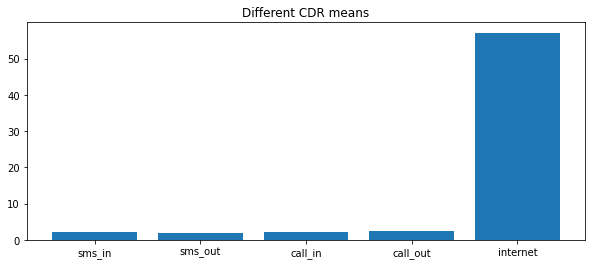

In [104]:
cdrs = ["sms_in", "sms_out", "call_in", "call_out", "internet"]
cdrs_means = [means["sms_in"],means["sms_out"],means["call_in"],means["call_out"],means["internet"]]
figure, ax = plt.subplots(figsize = (10,4))
ax.set_title("Different CDR means")
# ax.figure(figsize = (10,5))
ax.bar(cdrs,cdrs_means );


As the mean of different cdrs shows, the <b>internet</b> cdrs is the dominant